# **The Effect of Psychology on B12**

#### İrem Dereli

This project aims to detect a person's B12 level by looking him/her psychology and mental health.


## **Table of Content**

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## **Problem** <a class="anchor" id="problem"></a>

Psychology and mental health problems are really common in this century. And the lack of vitamin B12 causes some other big health problems like anemia, forgetfulness, neurologic, gastrointestinal problems, etc. Psychology problems can occur for many reasons such as childhood traumas, private life, family problems, work-life, and so on.<br> B12 of a person can be low, normal, or high. Depending on the medical articles, the lower limit of B12 is 200pg/ml and should not be lower than 300pg/ml. Smaller than 300pg/ml values are really low levels for B12 and this can cause a person to stay at the hospital for days. But doctors suggest using oral supplements if B12 is lower than 500pg/ml.


---


As mentioned above, the result of the B12 level will be either low, medium, or high. And this is a classification problem with three categories.

## **Data Understanding**<a class="anchor" id="data_understanding"></a>

The 'National Health and Nutrition Examination Survey(NHANES)' is online dataset repository at www.cdc.gov. Starting from 1999, there are total of 11 datasets, one for each two years. In this project, selected years are 2013-2014 depending on the large amount of B12 data. There is a total of 14,332 persons who attended the survey. 

The dataset contains 5 parts; demographics, examinations, dietary, laboratory, and questionnaire. Demographics, laboratory, and questionnaire parts will be used in this project. 

The demographics part contains individual, family, and household information about person. Gender and age will be taken.

The laboratory part contains blood values and only value of B12 will be taken. Laboratory part is for people that aged 20 between 80.

And lastly, the questionnaire part contains a mental health screener, relationship, family, and sample person questions. Questions related to psychology, mental health, and related to psychology such as household income, sleep disorders will be used in the model.

###Inspecting the data

In [1]:
# load the pandas library
import pandas as pd

# load the data
demographic = pd.read_csv('dataset/demographic.csv', index_col=False)
labs = pd.read_csv('dataset/labs.csv', index_col=False)
questionnaire = pd.read_csv('dataset/questionnaire.csv', index_col=False)

### Inspect the demographic dataset.

In [2]:
demographic.shape

(10175, 47)

There are 47 features and 10175 records in the demographic dataset. The model will be used gender and age from this dataset.<br>RIAGENDR represents gender and RIDAGEYR represents age.

In [3]:
demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [4]:
# get only gender and age columns
demographic = demographic[['SEQN', 'RIDAGEYR', 'RIAGENDR']]

# change the names of columns
demographic.rename(columns={'SEQN': 'ID', 'RIDAGEYR': 'Age', 'RIAGENDR': 'Gender'}, inplace=True)

demographic.head()

,ID,Age,Gender
0,73557,69,1
1,73558,54,1
2,73559,72,1
3,73560,9,1
4,73561,73,2


In gender column, 1 represents male and 2 represents female.
<br>Visualization of distribution of gender

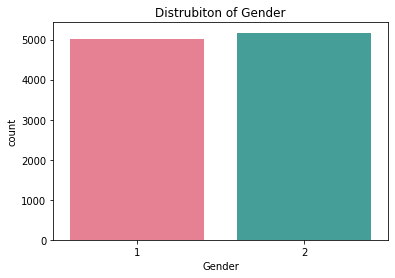

In [5]:
# Load the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(demographic['Gender'], label='Count', palette='husl')
plt.title("Distrubiton of Gender")
plt.show()

In [6]:
male = (demographic['Gender']==1).sum()
female = (demographic['Gender']==2).sum()

print("There are {} male attenders".format(male))
print("There are {} female attenders".format(female))

There are 5003 male attenders
There are 5172 female attenders


In [7]:
print("There are {} different ages".format(len(demographic['Age'].unique())))

There are 81 different ages


### Inspect the labs dataset.


In [8]:
labs.shape

(9813, 424)

In [9]:
labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


There are 424 features and 9813 records in the dataset. B12 will be used only from this dataset.<br>LBDB12 represents B12 value.

In [10]:
# Get the columns of id and B12
labs = labs[['SEQN', 'LBDB12']]

# Change the names of columns
labs.rename(columns={'SEQN': 'ID', 'LBDB12': 'B12'}, inplace=True)

labs.head()

,ID,B12
0,73557,524.0
1,73558,507.0
2,73559,732.0
3,73560,NaN
4,73561,225.0


In [11]:
labs['B12'].dtype

dtype('float64')

B12 values are stored as float.



In [12]:
labs['B12'].isnull().sum()

4497

4497 records have missing B12 value.


In [13]:
labs['B12'].describe()

count     5316.000000
mean       635.500376
std        716.879853
min         18.000000
25%        381.000000
50%        514.000000
75%        711.000000
max      26801.000000
Name: B12, dtype: float64

Maximum B12 value in the dataset is 26801 and minimum is 18. We can say that people have normal B12 value averagely.

---



### Inspect the questionnaire dataset.

In [14]:
questionnaire.shape

(10175, 953)

This dataset has more features compared to others. Has 953 features. But as mentioned above, only columns that related to mental health and psychology will be selected.

In [15]:
questionnaire.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In the questionnaire dataset, columns that will be selected are listed below.

*   **DPQ010**: Have little interest in doing things
*   **DPQ020**: Feeling down, depressed or hopeless
*   **DPQ030**: Trouble sleeping or sleeping too much
*   **DPQ040**: Feeling tired or having little energy
*   **DPQ050**: Poor appetite or overeating
*   **DPQ060**: Feeling bad about yourself
*   **DPQ070**: Trouble concentrating on things
*   **DPQ080**: Moving or speaking slowly or too fast
*   **DPQ090**: Thought you would be better off dead
*   **DPQ100**: How difficult have these problems made it for you to do your work, take care of things at home, or get along with people?
<br><br>
*   **SLQ050**: Ever told doctor had trouble sleeping?
*   **SLQ060**: Ever told by doctor have sleep disorder?
<br><br>
*   **IND235**: Monthly family income



In [16]:
# Get the columns
questionnaire = questionnaire[['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'SLQ050', 'SLQ060', 'IND235']]

# Change the name of id column
questionnaire.rename(columns={'SEQN': 'ID'}, inplace=True)

questionnaire.head()

,ID,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,73557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,73558,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,73559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,73561,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0


One of the column that will be selected is DPQ020. Asks the people who attends 'Feeling down, depressed or hopeless?' Let's invest this column. All the other columns that related to mental health are same (columns that starts with DPQ).

In [17]:
questionnaire['DPQ020'].unique()

array([ 0., nan,  1.,  3.,  2.,  7.,  9.])


*   0: Not at all
*   1: Several days
*   2: More than half the days
*   3: Nearly every day
*   7: Refused
*   9: Don't know
*   And some missing data



Other column will be selected is related to sleep disorders and has categorical values too.

In [18]:
questionnaire['SLQ050'].unique()

array([ 1.,  2., nan,  9.])



*   1: Yes
*   2: No
*   9: Don't know



## **Data Preparation**<a class="anchor" id="data_preparation"></a>

Age column with non-categorical values will not mean anything to the model. Values need to be categorized and will be as below.<br>

*   1: 20 - 29
*   2: 30 - 39
*   3: 40 - 49
*   4: 50 - 59
*   5: 60 - 69
*   6: 70 - 80



In [19]:
# categorize the data
demographic['Age'] = pd.cut(demographic['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6], include_lowest=True)

demographic.head()

,ID,Age,Gender
0,73557,5,1
1,73558,4,1
2,73559,6,1
3,73560,NaN,1
4,73561,6,2


The reason that dataset have a nan value on age column is, laboratory dataset only have records that person aged 20 between 80 as mentioned above. Data outside the age of 20 and 80 will have nan value.







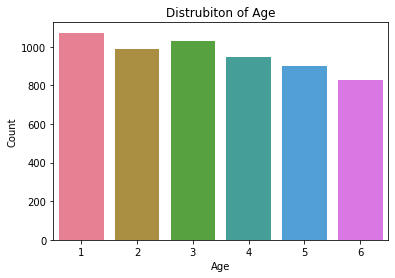

In [20]:
# visualize the distrubiton of age
sns.countplot(demographic['Age'], palette='husl')
plt.ylabel('Count')
plt.title('Distrubiton of Age')
plt.show()

The distrubiton of ages are nearly close. We can say that most participation is from age between 20 and 29. And worst participation is from age between 70 and 80.

---



Records that has missing values of B12 will be dropped because the model will predict the rank of B12.

In [21]:
# Drop the records with null value in column B12
labs.dropna(axis=0, inplace=True)

labs.shape

(5316, 2)

There is 5316 records after dropping the null records.

In the labs dataset, there are 424 features. Needed one is the only value of B12. And B12 values will also be categorized as below.<br>

*   Low = 1: 0 - 300
*   Normal = 2: 301 - 950
*   High = 3: 950 - 27000



In [22]:
# Categorize the data
labs['B12'] = pd.cut(labs['B12'], bins=[0, 300, 950, 27000], labels=[1, 2, 3])

labs.head()


,ID,B12
0,73557,2
1,73558,2
2,73559,2
4,73561,1
5,73562,2


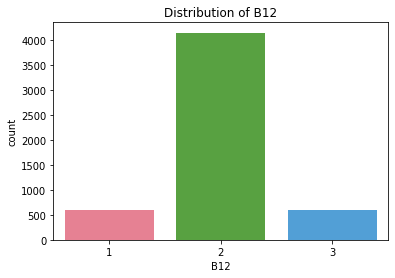

In [23]:
# Visualize the distribution of B12 values
sns.countplot(labs['B12'], label='Count', palette='husl')
plt.title('Distribution of B12')
plt.show()

As we can see from the graph, people generally have normal B12 value. But this also says that the data is unbalanced. This may make the model to tend to category 2.

In [24]:
lab['B12'].value_counts()

NameError: name 'lab' is not defined

Merge the demographics, labs and questionnaire parts.

In [25]:
data = labs.merge(demographic, on="ID").merge(questionnaire, on="ID")

data.head()

,ID,B12,Age,Gender,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,73557,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,73558,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,73559,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,73561,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0
4,73562,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,10.0


Id is redundant anymore. Will drop it.

In [26]:
data.drop('ID', axis=1, inplace=True)

data.head()

,B12,Age,Gender,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SLQ050,SLQ060,IND235
0,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
1,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,10.0
3,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,11.0
4,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,1.0,10.0


Let's invest the values of columns

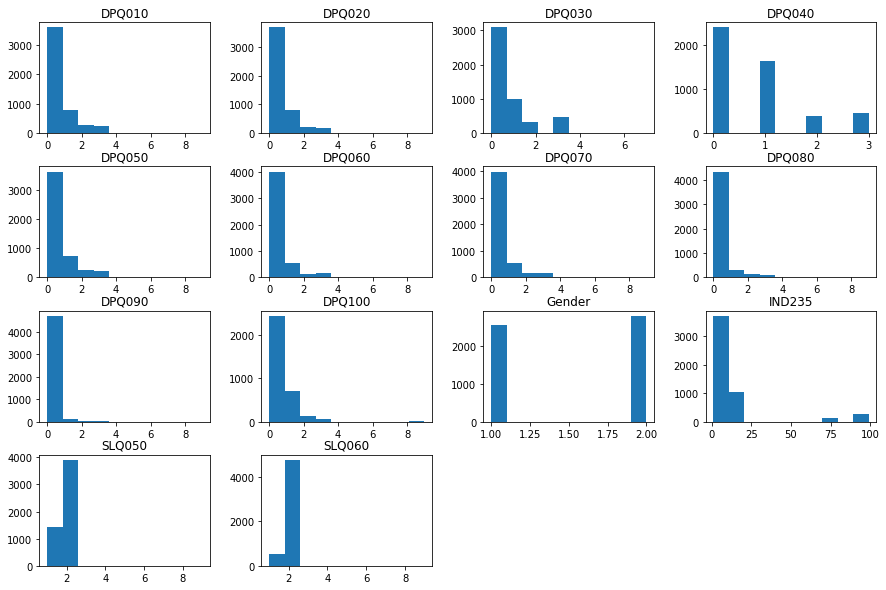

In [27]:
data.hist(figsize=(15, 10),grid=False)
plt.show()

We can say that, people generally answers the questions as 'not at all'(0).

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5315
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     5316 non-null   category
 1   Age     5316 non-null   category
 2   Gender  5316 non-null   int64   
 3   DPQ010  4875 non-null   float64 
 4   DPQ020  4873 non-null   float64 
 5   DPQ030  4872 non-null   float64 
 6   DPQ040  4872 non-null   float64 
 7   DPQ050  4872 non-null   float64 
 8   DPQ060  4871 non-null   float64 
 9   DPQ070  4871 non-null   float64 
 10  DPQ080  4871 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  DPQ100  3315 non-null   float64 
 13  SLQ050  5316 non-null   float64 
 14  SLQ060  5316 non-null   float64 
 15  IND235  5113 non-null   float64 
dtypes: category(2), float64(13), int64(1)
memory usage: 633.7 KB


There is a total of 5316 records in the dataset. But there are some null values for some features. Especially, the DPQ100 feature has a lot of null records compared to others. Putting average value to these records makes the model work badly, so we will drop this column from the dataset.

In [29]:
data.drop('DPQ100', axis=1, inplace=True)
data.head()

,B12,Age,Gender,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SLQ050,SLQ060,IND235
0,2,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
1,2,4,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,10.0
3,1,6,2,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,11.0
4,2,4,1,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,2.0,1.0,10.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 0 to 5315
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     5316 non-null   category
 1   Age     5316 non-null   category
 2   Gender  5316 non-null   int64   
 3   DPQ010  4875 non-null   float64 
 4   DPQ020  4873 non-null   float64 
 5   DPQ030  4872 non-null   float64 
 6   DPQ040  4872 non-null   float64 
 7   DPQ050  4872 non-null   float64 
 8   DPQ060  4871 non-null   float64 
 9   DPQ070  4871 non-null   float64 
 10  DPQ080  4871 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  SLQ050  5316 non-null   float64 
 13  SLQ060  5316 non-null   float64 
 14  IND235  5113 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 592.1 KB


After dropping the column, there is 13 features and still have null records. Features related to mental health (starts with DPQ) are more important compared to others. So, they cannot have a missing value. Records that have a missing value on the mental health features will be dropped from the dataset.

In [31]:
data.dropna(subset=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 5314
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     4870 non-null   category
 1   Age     4870 non-null   category
 2   Gender  4870 non-null   int64   
 3   DPQ010  4870 non-null   float64 
 4   DPQ020  4870 non-null   float64 
 5   DPQ030  4870 non-null   float64 
 6   DPQ040  4870 non-null   float64 
 7   DPQ050  4870 non-null   float64 
 8   DPQ060  4870 non-null   float64 
 9   DPQ070  4870 non-null   float64 
 10  DPQ080  4870 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  SLQ050  4870 non-null   float64 
 13  SLQ060  4870 non-null   float64 
 14  IND235  4702 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 542.5 KB


Now, we have 4870 records and still have missing values on the IND235 feature. Because the DPQ features are important, will not drop these records from the dataset and will fill the missing values with the average values.

In [32]:
data['IND235'].describe()

count    4702.000000
mean       13.038707
std        22.309702
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        99.000000
Name: IND235, dtype: float64

The average is 6.95 ~ 7. Also in the dataset, 77 represents 'refused' and 99 represents 'don't know'. Will fill these values with 7 also.

In [33]:
data['IND235'].replace({77: 7, 99: 7, None: 7}, inplace=True)


Also the DPQ and SLQ features have refused as 7 and don't know as 9 values. Will replace these values with most occurred value 0 (not at all).

In [34]:
data[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'SLQ050', 'SLQ060']].replace({7: 0, 9: 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 5314
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B12     4870 non-null   category
 1   Age     4870 non-null   category
 2   Gender  4870 non-null   int64   
 3   DPQ010  4870 non-null   float64 
 4   DPQ020  4870 non-null   float64 
 5   DPQ030  4870 non-null   float64 
 6   DPQ040  4870 non-null   float64 
 7   DPQ050  4870 non-null   float64 
 8   DPQ060  4870 non-null   float64 
 9   DPQ070  4870 non-null   float64 
 10  DPQ080  4870 non-null   float64 
 11  DPQ090  4870 non-null   float64 
 12  SLQ050  4870 non-null   float64 
 13  SLQ060  4870 non-null   float64 
 14  IND235  4870 non-null   float64 
dtypes: category(2), float64(12), int64(1)
memory usage: 542.5 KB


Convert the age and B12 columns from category to int.

In [35]:
data['B12'] = data['B12'].astype(int)
data['Age'] = data['Age'].astype(int)

Now our dataset is ready.

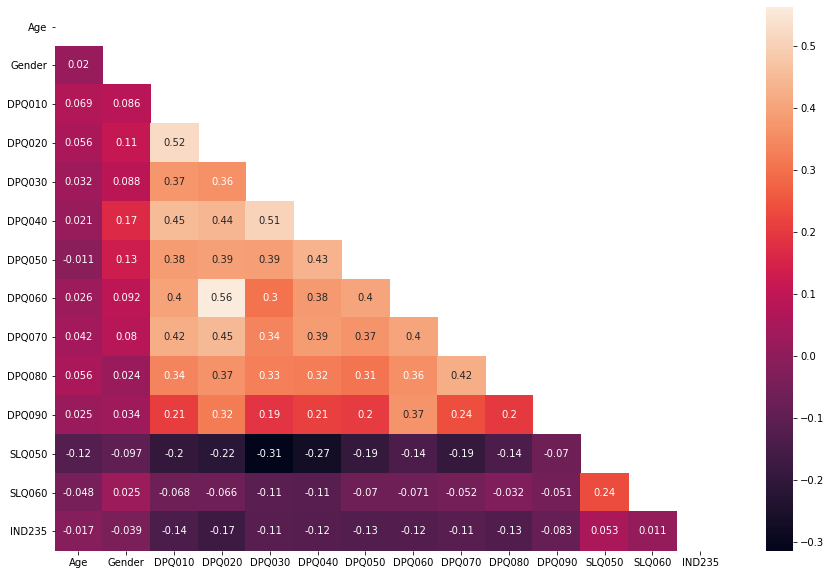

In [36]:
# load the numpy library
import numpy as np

# graph size
plt.figure(figsize=(15, 10))

# to get the lower diagonal of the correlation matrix, using the numpy library
mask = np.triu(data.iloc[:, 1:].corr())

sns.heatmap(data.iloc[:, 1:].corr(), annot=True, mask=mask)

# change the direction of ticks on y axis
plt.yticks(rotation=0)

plt.show()



*   We can say that columns that starts with DPQ have positive correlation and higher values compared to others.
*   Columns starts with SLQ are not highly correlated and have positive correlation but with all other columns except gender, have negative correlation (SLQ050 column also have negative correlation with gender)
*   We can see that total monthly income is not really correlated with other features.



## **Modeling**<a class="anchor" id="modeling"></a>

### For Unbalanced Data

In [37]:
# load the libraries
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density

from sklearn import metrics

# split the data into features and target
X = data.iloc[:, 1:15]
y = data.iloc[:, 0]

# split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True) # 70% training and 30% test

Benchmark classifier is a function that makes us able to compare the different algorithms.

In [38]:
from time import time
# Benchmark classifier
def benchmark(clf, X_train, y_train, X_test, y_test):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

    print("classification report:")
    print(metrics.classification_report(y_test, pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [39]:
# Different algorithms
results = []
for clf, name in (
        (tree.DecisionTreeClassifier(), "Decision Tree"),
        (RandomForestClassifier(n_estimators=100), "Random Forest"),
        (GaussianNB(), "Gauissian Naive Bayes"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (LogisticRegression(), "Logistic Regression"),
        (svm.SVC(), "Support Vector Machines"),
    ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf, X_train, y_train, X_test, y_test))

Decision Tree
________________________________________________________________________________
Training: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
train time: 0.013s
test time:  0.002s
accuracy:   0.643
classification report:
              precision    recall  f1-score   support

           1       0.11      0.11      0.11       169
           2       0.78      0.80      0.79      1116
           3       0.17      0.14      0.16       176

    accuracy                           0.64      1461
   macro avg       0.35      0.35      0.35      1461
weighted avg       0.63      0.64      0.64      1461

confusi

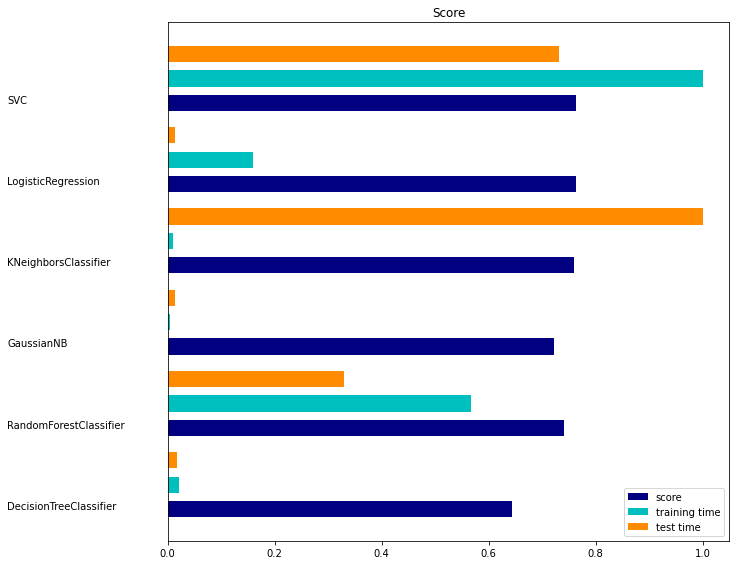

In [40]:
# plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

When comparing the accuracy of the models, two algorithms with the highest accuracy are Logistic Regression and Support Vector Classifier, but when we consider 'precision', 'recall' and 'f1score' values, it is not very successful models, only 'Normal' value B12 prediction we can see what model did. Therefore, when we compare these two models, we will use the Gaussian Naive Bayes algorithm in our project, whose accuracy rate is not very different, but also predicts other categories.

Since 'hyperparameters' cannot be made in the Gaussian Naive Bayes algorithm, we cannot use Grid Search. Instead, we try the Grid Search algorithm to see if we can get better results in Random Forest, the best model after Naive Bayes.

In [41]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=1, n_estimators = 10, min_samples_split = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  7.2min finished


In [42]:
# best parameters on model
gridF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [43]:
gridF.refit
preds = gridF.predict(X_test)
probs = gridF.predict_proba(X_test)

# accuracy score
np.mean(preds == y_test)

0.7638603696098563

In [44]:
print(metrics.classification_report(y_test, preds, target_names=['Low', 'Normal', 'High']))

precision    recall  f1-score   support

         Low       0.00      0.00      0.00       169
      Normal       0.76      1.00      0.87      1116
        High       0.00      0.00      0.00       176

    accuracy                           0.76      1461
   macro avg       0.25      0.33      0.29      1461
weighted avg       0.58      0.76      0.66      1461



As a result of Grid Search, we see that the accuracy rate increased by 3%, but caused a negative effect on the classification report. We see that it cannot predict low and high B12 categories (1 and 3). Therefore, we continue with the Naive Bayes algorithm.

### With Balanced Data

We have seen above that there are many more participants with "Normal" B12 in our data. Therefore, we will make the categories more balanced and reconstruct our model. There are about 530 data in other categories. We select 1000 data from the normal category. The reason for this is that we do not want to lose too much data.

In [45]:
balanced_data = data.copy()

balanced_data[balanced_data['B12'] == 2] = balanced_data[balanced_data['B12'] == 2].sample(1000, random_state=42)
balanced_data = balanced_data[balanced_data['B12'].notnull()]
balanced_data['B12'].value_counts()

2.0    1000
1.0     536
3.0     529
Name: B12, dtype: int64

In [46]:
# split the data into features and target
X_balanced = balanced_data.iloc[:, 1:15]
y_balanced = balanced_data.iloc[:, 0]

# split the data into test and train
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, shuffle=True) # 70% training and 30% test

In [47]:
results_balanced = []
for clf, name in (
        (tree.DecisionTreeClassifier(), "Decision Tree"),
        (RandomForestClassifier(n_estimators=100), "Random Forest"),
        (GaussianNB(), "Gauissian Naive Bayes"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (LogisticRegression(), "Logistic Regression"),
        (svm.SVC(), "Support Vector Machines"),
    ):
    print('=' * 80)
    print(name)
    results_balanced.append(benchmark(clf, X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced))

Decision Tree
________________________________________________________________________________
Training: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
train time: 0.009s
test time:  0.001s
accuracy:   0.376
classification report:
              precision    recall  f1-score   support

         1.0       0.22      0.28      0.25       145
         2.0       0.48      0.49      0.49       288
         3.0       0.36      0.27      0.31       187

    accuracy                           0.38       620
   macro avg       0.35      0.35      0.35       620
weighted avg       0.38      0.38      0.38       620

confusi

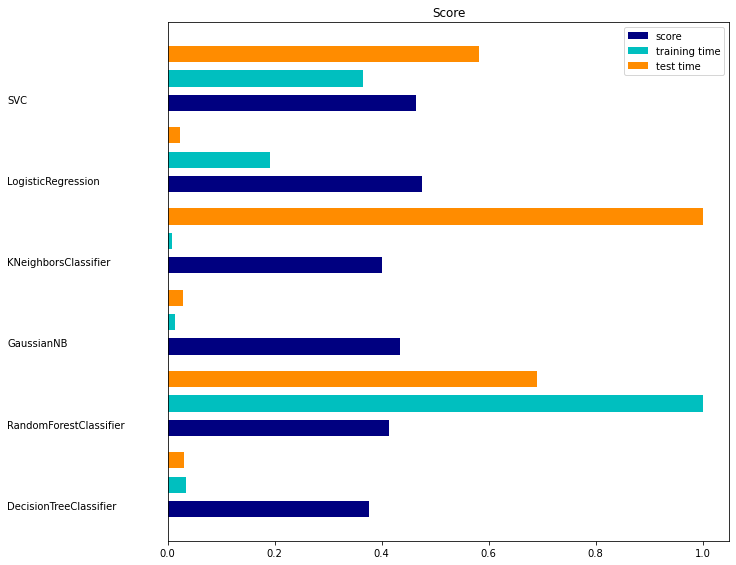

In [48]:
# make plots

indices = np.arange(len(results_balanced))

results_balanced = [[x[i] for x in results_balanced] for i in range(4)]

clf_names, score, training_time, test_time = results_balanced
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

Accuracy rate is lower than unbalanced data. Again, considering the accuracy rate, f1score, recall and precision values, we can see that the Gaussian Naive Bayes algorithm works better.

In [49]:
gridF_balanced = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF_balanced = gridF_balanced.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.9min finished


In [50]:
gridF_balanced.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'n_estimators': 300}

In [51]:
gridF_balanced.refit
preds = gridF_balanced.predict(X_test_balanced)
probs = gridF_balanced.predict_proba(X_test_balanced)

# accuracy score
np.mean(preds == y_test_balanced)

0.47580645161290325

In [52]:
print(metrics.classification_report(y_test_balanced, preds, target_names=['Low', 'Normal', 'High']))

precision    recall  f1-score   support

         Low       0.00      0.00      0.00       145
      Normal       0.47      0.98      0.64       288
        High       0.61      0.07      0.13       187

    accuracy                           0.48       620
   macro avg       0.36      0.35      0.26       620
weighted avg       0.40      0.48      0.34       620



As with the unbalanced data set, our accuracy rate increased by about 6% but had a negative impact on our classification report.

## **Evaluation**<a class="anchor" id="evaluation"></a>

In [53]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Accuracy score is {}".format(metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred, target_names=['Low', 'Normal', 'High']))

Accuracy score is 0.7214236824093087
              precision    recall  f1-score   support

         Low       0.12      0.04      0.05       169
      Normal       0.77      0.93      0.84      1116
        High       0.19      0.07      0.10       176

    accuracy                           0.72      1461
   macro avg       0.36      0.34      0.33      1461
weighted avg       0.62      0.72      0.66      1461



Recall is ability of a classification model to identify all relevant instances.
We can see that recall is only good for normal B12 values. Model is not very successful for low and high.

Precision is ability of a classification model to return only relevant instances.
Our model is so successful at normal values but not very successful at low and high values.


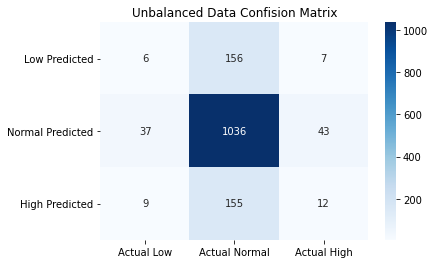

In [54]:
rslt = metrics.confusion_matrix(y_test, pred)
sns.heatmap(pd.DataFrame(rslt, index=['Low Predicted', 'Normal Predicted', 'High Predicted'], columns=['Actual Low', 'Actual Normal', 'Actual High']), annot=True, fmt='d', cmap='Blues')
plt.title('Unbalanced Data Confision Matrix')
plt.show()

Confision matrix shows that, model tends to predict normal values more. The reason is data is unbalanced and normal values are much more than others. We can see that, model predicts 80 values as normal but actually low or high.


In [55]:
model.fit(X_train_balanced, y_train_balanced)
pred_balanced = model.predict(X_test_balanced)

print("Accuracy score for balanced data is {}".format(metrics.accuracy_score(y_test_balanced, pred_balanced)))
print(metrics.classification_report(y_test_balanced, pred_balanced, target_names=['Low', 'Normal', 'High']))

Accuracy score for balanced data is 0.4338709677419355
              precision    recall  f1-score   support

         Low       0.24      0.12      0.16       145
      Normal       0.52      0.58      0.55       288
        High       0.38      0.45      0.41       187

    accuracy                           0.43       620
   macro avg       0.38      0.38      0.37       620
weighted avg       0.41      0.43      0.42       620



Recall is ability of a classification model to identify all relevant instances.
Recall of balanced data looks better than recall of unbalanced data. High values are now having a good percentage of recall, normal is still good. Low could be better.

Precision is ability of a classification model to return only relevant instances.
Precision of balanced data is much better than precision of unbalanced data. All categories have now acceptable precisions.


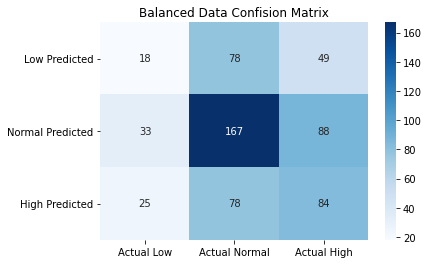

In [56]:
rslt_balanced = metrics.confusion_matrix(y_test_balanced, pred_balanced)
sns.heatmap(pd.DataFrame(rslt_balanced, index=['Low Predicted', 'Normal Predicted', 'High Predicted'], columns=['Actual Low', 'Actual Normal', 'Actual High']), annot=True, fmt='d', cmap='Blues')
plt.title('Balanced Data Confision Matrix')
plt.show()

Now the result with balanced data shows that model not tend to predict normal values more. It predicts all values but because of accuracy is bad, it predicts more wrongly.

---


When we compare the two results, we can see that the accuracy rate is better for the unbalanced data set, but when we look at the classification report, we can see that the balanced data set is better.

## **References**<a class="anchor" id="references"></a>



*   https://github.com/Jean-njoroge/Breast-cancer-risk-prediction
*   https://dizziness-and-balance.com/disorders/central/b12.html



**Disclaimer!** <font color='grey'>This notebook was prepared by İrem Dereli as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>